In [1]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder   

In [2]:
# Importing the dataset
dataset = pd.read_csv('crimedata.csv')
X = dataset.iloc[:, [1,2,3,4,5,6,7,12]].values
dataset.park = dataset.park.astype(str)
X=dataset[['park', 'assassination', 'theft', 'gang_rape' , 'burglary' ,'rape' ,'assualt_attack', 'harassment(sexual)']] = dataset[
             ['park', 'assassination', 'theft', 'gang_rape' , 'burglary' ,'rape' ,'assualt_attack', 'harassment(sexual)']].apply(LabelEncoder().fit_transform)

In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

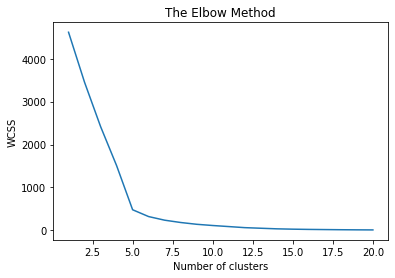

In [4]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 21):   #range(1,1154)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)  #random state 1 or 42
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 1)  #n_cluster 5 or 6
y_kmeans = kmeans.fit_predict(X)

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X = kpca.fit_transform(X)


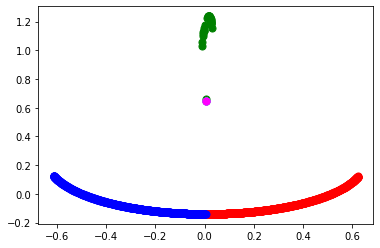

In [6]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta' )
#plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 50, c = 'black' )

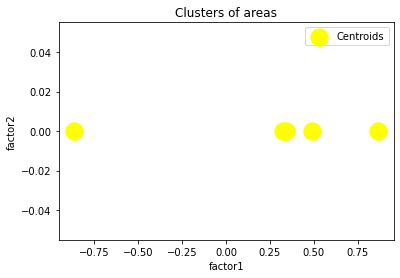

In [7]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
print("")
plt.title('Clusters of areas')
plt.xlabel('factor1')
plt.ylabel('factor2')
plt.legend()
plt.show()

In [ ]:
y_kmeans.reshape(1,1154)

array([[0, 0, 0, ..., 0, 1, 4]], dtype=int32)